# Air Quality Analysis across European Cities
# =======================================

This notebook demonstrates how to analyze air quality data from three European cities:
Antwerp, Paris, and London. We'll cover data loading, cleaning, visualization, and basic analysis.

## 1. Setting up the Environment
First, let's import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style for better visualization
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("muted")
sns.set_context("notebook", font_scale=1.2)

print("Environment setup complete!")

Environment setup complete!


## 2. Loading the Data
Now we'll load the dataset from the CSV file

In [2]:
# Load the dataset from the CSV file
# The file name is air_quality_no2.csv which contains NO2 measurements
file_path = 'air_quality_no2.csv'
df = pd.read_csv(file_path)

# Let's check the first few rows to understand the data
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


,datetime,station_antwerp,station_paris,station_london
0,2019-05-07 02:00:00,NaN,NaN,23.0
1,2019-05-07 03:00:00,50.5,25.0,19.0
2,2019-05-07 04:00:00,45.0,27.7,19.0
3,2019-05-07 05:00:00,NaN,50.4,16.0
4,2019-05-07 06:00:00,NaN,61.9,NaN


Let's convert the datetime column to the proper format

In [3]:
# Convert datetime string to datetime object
df['datetime'] = pd.to_datetime(df['datetime'])

# Display the dataset
print("Air Quality Dataset with datetime converted:")
df

Air Quality Dataset with datetime converted:


,datetime,station_antwerp,station_paris,station_london
0,2019-05-07 02:00:00,NaN,NaN,23.0
1,2019-05-07 03:00:00,50.5,25.0,19.0
2,2019-05-07 04:00:00,45.0,27.7,19.0
3,2019-05-07 05:00:00,NaN,50.4,16.0
4,2019-05-07 06:00:00,NaN,61.9,NaN
...,...,...,...,...
1030,2019-06-20 22:00:00,NaN,21.4,NaN
1031,2019-06-20 23:00:00,NaN,24.9,NaN
1032,2019-06-21 00:00:00,NaN,26.5,NaN
1033,2019-06-21 01:00:00,NaN,21.8,NaN


## 3. Data Cleaning and Preparation
Let's check for missing values and prepare our data for analysis

In [4]:
# Let's check for missing values
print("Missing Values per Column:")
missing_values = df.isna().sum()
missing_values

Missing Values per Column:


datetime             0
station_antwerp    940
station_paris       31
station_london      66
dtype: int64

In [5]:
# Let's create a cleaner version for visualization, filling missing values with NaN
df_clean = df.copy()

# Set the datetime as index for time series analysis
df_clean.set_index('datetime', inplace=True)

print("Dataset with datetime as index:")
df_clean

Dataset with datetime as index:


,station_antwerp,station_paris,station_london
datetime,,,
2019-05-07 02:00:00,NaN,NaN,23.0
2019-05-07 03:00:00,50.5,25.0,19.0
2019-05-07 04:00:00,45.0,27.7,19.0
2019-05-07 05:00:00,NaN,50.4,16.0
2019-05-07 06:00:00,NaN,61.9,NaN
...,...,...,...
2019-06-20 22:00:00,NaN,21.4,NaN
2019-06-20 23:00:00,NaN,24.9,NaN
2019-06-21 00:00:00,NaN,26.5,NaN


## 4. Data Visualization
Let's create a visualization of the air quality measurements over time

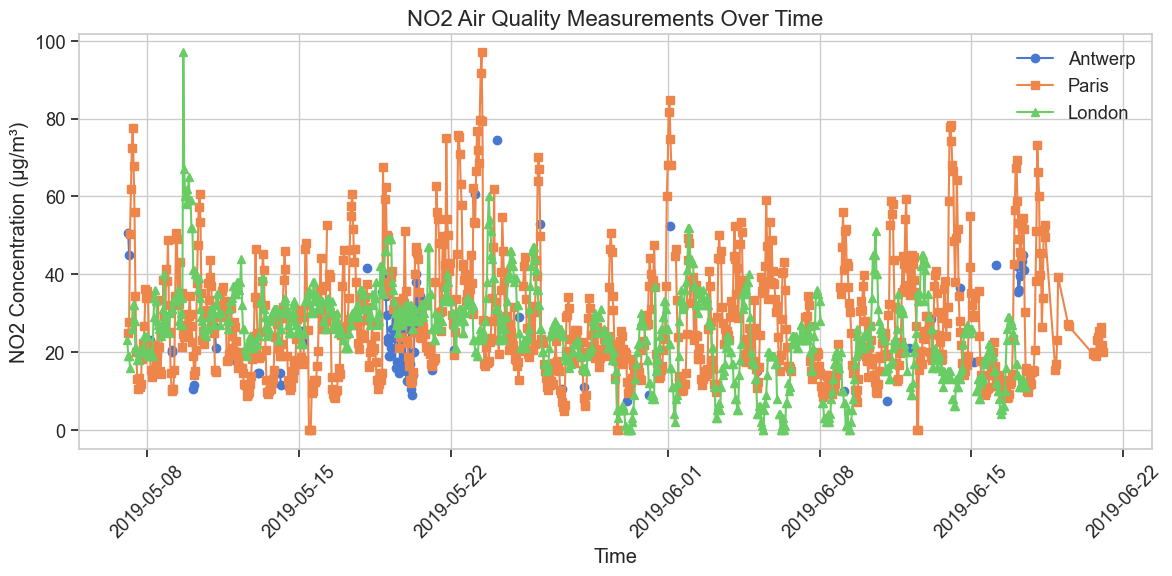

In [6]:
plt.figure(figsize=(12, 6))

# Plot each station's data
plt.plot(df_clean.index, df_clean['station_antwerp'], 'o-', label='Antwerp')
plt.plot(df_clean.index, df_clean['station_paris'], 's-', label='Paris')
plt.plot(df_clean.index, df_clean['station_london'], '^-', label='London')

plt.title('NO2 Air Quality Measurements Over Time', fontsize=16)
plt.xlabel('Time')
plt.ylabel('NO2 Concentration (μg/m³)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

## 5. Statistical Analysis
Calculate some basic statistics for each station

In [7]:
print("Basic Statistics for NO2 Measurements:")
stats = df_clean.describe()
stats

Basic Statistics for NO2 Measurements:


,station_antwerp,station_paris,station_london
count,95.000000,1004.000000,969.000000
mean,25.778947,27.740538,24.777090
std,12.682019,15.285746,11.214377
min,7.500000,0.000000,0.000000
25%,16.750000,16.500000,19.000000
50%,23.000000,24.150000,25.000000
75%,34.500000,35.925000,31.000000
max,74.500000,97.000000,97.000000


In [8]:
# Calculate average NO2 level by station
avg_by_station = df_clean.mean()
print("Average NO2 Levels by Station:")
avg_by_station

Average NO2 Levels by Station:


station_antwerp    25.778947
station_paris      27.740538
station_london     24.777090
dtype: float64

## 6. Handling Missing Values
Several approaches can be used for missing values

In [ ]:
print("Demonstrating different methods for handling missing values:")

# Method 1: Forward fill (use previous value)
df_ffill = df_clean.ffill()
print("\nForward Fill Method:")
df_ffill

In [ ]:
# Method 2: Backward fill (use next value)
df_bfill = df_clean.bfill()
print("\nBackward Fill Method:")
df_bfill

In [9]:
# Method 3: Linear interpolation
df_interp = df_clean.interpolate(method='linear')
print("\nLinear Interpolation Method:")
df_interp


Linear Interpolation Method:


,station_antwerp,station_paris,station_london
datetime,,,
2019-05-07 02:00:00,NaN,NaN,23.0
2019-05-07 03:00:00,50.500000,25.0,19.0
2019-05-07 04:00:00,45.000000,27.7,19.0
2019-05-07 05:00:00,44.043478,50.4,16.0
2019-05-07 06:00:00,43.086957,61.9,21.0
...,...,...,...
2019-06-20 22:00:00,41.000000,21.4,11.0
2019-06-20 23:00:00,41.000000,24.9,11.0
2019-06-21 00:00:00,41.000000,26.5,11.0


## 7. Visualizing Interpolated Data
Let's visualize our data after interpolation

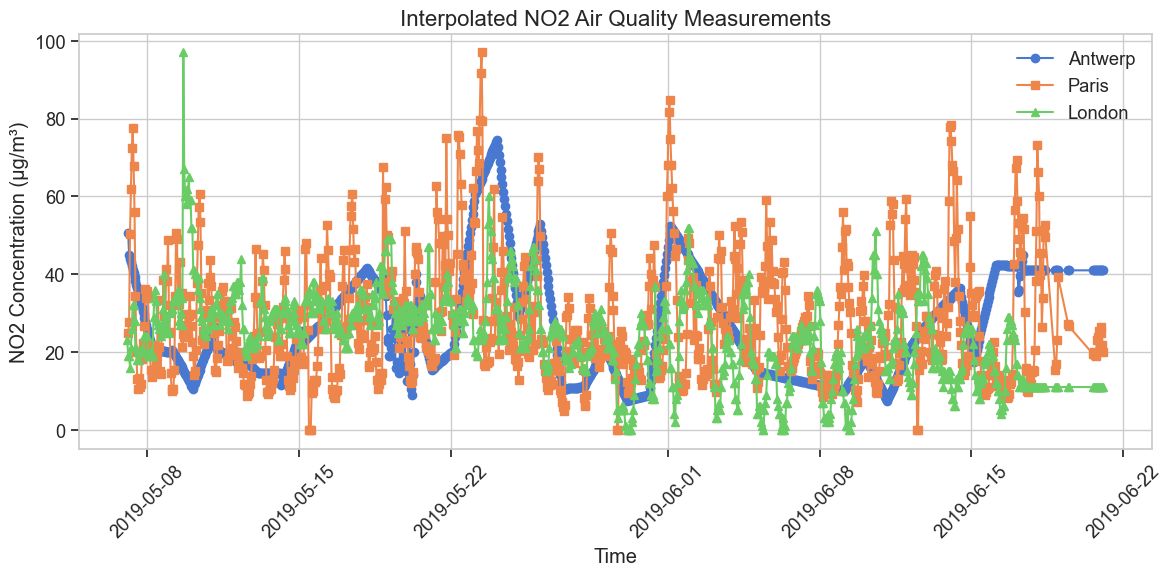

In [10]:
plt.figure(figsize=(12, 6))

# Plot each station's interpolated data
plt.plot(df_interp.index, df_interp['station_antwerp'], 'o-', label='Antwerp')
plt.plot(df_interp.index, df_interp['station_paris'], 's-', label='Paris')
plt.plot(df_interp.index, df_interp['station_london'], '^-', label='London')

plt.title('Interpolated NO2 Air Quality Measurements', fontsize=16)
plt.xlabel('Time')
plt.ylabel('NO2 Concentration (μg/m³)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

## 8. Comparing Stations
Create a box plot to compare distributions

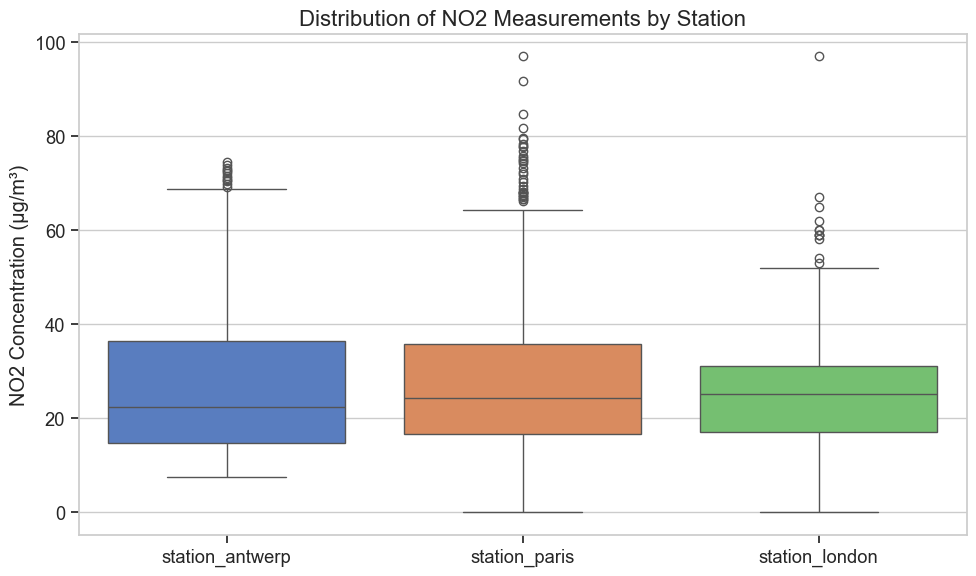

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_interp)
plt.title('Distribution of NO2 Measurements by Station', fontsize=16)
plt.ylabel('NO2 Concentration (μg/m³)')
plt.xticks(rotation=0)
plt.grid(True, axis='y')
plt.tight_layout()